In [1]:
from src import *

def get_confusion_matrix(data_path, threshold = 0.5):
    npzfile = np.load(data_path)
    gross_scores_positive=npzfile['x']
    gross_scores_negative=npzfile['y']
    true_positive = (gross_scores_positive > threshold).sum()/len(gross_scores_positive)
    true_negative = (gross_scores_negative < threshold).sum()/len(gross_scores_negative)
    false_positive = (gross_scores_negative > threshold).sum()/len(gross_scores_negative)
    false_negative = (gross_scores_positive < threshold).sum()/len(gross_scores_positive)
    return [[true_positive, false_positive], [false_negative, true_negative]]

In [2]:
get_confusion_matrix(data_path=r'gross_scores_naive_B.npz')

[[0.32, 0.33], [0.68, 0.67]]

In [3]:
get_confusion_matrix(data_path=r'gross_scores_pretrained_B.npz')

[[0.0, 0.0], [1.0, 1.0]]

In [4]:
def confusion_under_threshold(data_path, min=0, max=1, n_bit=100):
    npzfile = np.load(data_path)
    gross_scores_positive=npzfile['x']
    gross_scores_negative=npzfile['y']
    
    thresholds = np.linspace(min, max, n_bit)
    true_positives = []
    true_negatives = []
    false_positives = []
    false_negatives = []
    for threshold in thresholds:
        true_positives.append((gross_scores_positive > threshold).sum()/len(gross_scores_positive))
        true_negatives.append((gross_scores_negative < threshold).sum()/len(gross_scores_negative))
        false_positives.append((gross_scores_negative > threshold).sum()/len(gross_scores_negative))
        false_negatives.append((gross_scores_positive < threshold).sum()/len(gross_scores_positive))
    return thresholds, [[true_positives, false_positives], [false_negatives, true_negatives]]

In [5]:
def plot_confusion_under_threshold(data_path, min=0, max=1, n_bit=100):
    thresholds, [[true_positives, false_positives], [false_negatives, true_negatives]] = confusion_under_threshold(data_path, min, max, n_bit)
    plt.figure()
    plt.plot(thresholds, true_positives, label="true_positives")
    plt.plot(thresholds, false_positives, label="false_positives")
    plt.plot(thresholds, false_negatives, label="false_negatives")
    plt.plot(thresholds, true_negatives, label="true_negatives")
    plt.xlabel('threshold')
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.minorticks_on()
    plt.legend(loc='center right')
    plt.show()

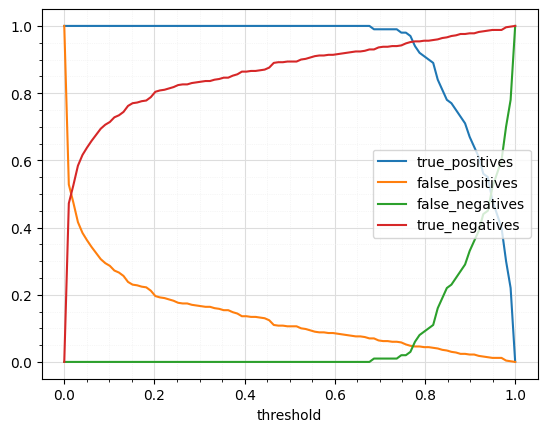

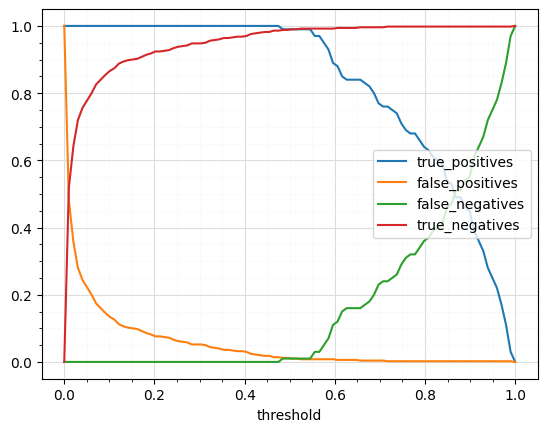

In [6]:
plot_confusion_under_threshold(data_path=r'gross_scores_naive_Isaac.npz', n_bit=100)
plot_confusion_under_threshold(data_path=r'gross_scores_pretrained_Isaac.npz', n_bit=100)